#  CURRENT FEATHER PLOT

In [1]:
#masukin library dulu 
from windrose import WindroseAxes
import netCDF4 as nc
import numpy as np
import pandas as pd
import math

## Input Data Arus

In [3]:
#masukin lokasi .nc nya dimana
fn='D:/smt7/asisten andat/3hrly.nc4'
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds=nc.Dataset(fn)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.0 NAVO_netcdf_v1.0
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_19.1/2000/3hrly; Translation Date = 2020-09-22T03:29:47.900Z
    geospatial_lat_min: -7.28000020980835
    geospatial_lat_max: -2.319999933242798
    geospatial_lon_min: 94.9599609375
    geospatial_lon_max: 102.0
    dimensions(sizes): time(248), depth(1), lat(63), lon(89)
    variables(dimensions): int16 water_u(time,depth,lat,lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon), int16 water_v

## Deklarasi Variabel
masukin variabel dalam nc ke variabel buatan kita sendiri

feather plot inputnya komponen u, v, dan waktu sebagai sumbu x

rose diagram itu, inputnya harus time series sedangkan pada input data kita tau kalo data yg di download merupakan data spasial makanya diambil deh satu kolom latitude dan longitudenya itu maksudnya ngambil 1 grid.

setiap orang dalam setiap kelompok diusahakan mengambil dari grid yang berbeda supaya dapat dilihat ketersesuaian data dalam satu daerah tersebut

grid yg diambil samain aja sama grid windrose dan current rose

In [6]:
u=ds.variables['water_u'][:,:,1,1]
v=ds.variables['water_v'][:,:,1,1]
lon=ds.variables['lon'][:]
lat=ds.variables['lat'][:]
time=ds.variables['time'][:]

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u))
print('dimensi v',np.shape(v))
print('dimensi lon',np.shape(lon))
print('dimensi lat',np.shape(lat))
print('dimensi time',np.shape(time))

dimensi u (248, 1)
dimensi v (248, 1)
dimensi lon (89,)
dimensi lat (63,)
dimensi time (248,)


In [10]:
#untuk melihat data
data_arus=pd.DataFrame(u,columns=['u'])
data_arus['v']=v
data_arus['time']=time

display(data_arus)

,u,v,time
0,0.167,0.058,0.0
1,0.159,0.089,3.0
2,0.115,0.094,6.0
3,0.101,0.056,9.0
4,0.114,0.018,12.0
...,...,...,...
243,-0.098,-0.208,729.0
244,-0.109,-0.318,732.0
245,-0.071,-0.397,735.0
246,0.028,-0.463,738.0


## Membuat Current Feather Plot

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num


def stick_plot(time, u, v, **kw):
    width = kw.pop('width', 0.002)
    headwidth = kw.pop('headwidth', 0)
    headlength = kw.pop('headlength', 0)
    headaxislength = kw.pop('headaxislength', 0)
    angles = kw.pop('angles', 'uv')
    ax = kw.pop('ax', None)
    
    if angles != 'uv':
        raise AssertionError("Stickplot angles must be 'uv' so that"
                             "if *U*==*V* the angle of the arrow on"
                             "the plot is 45 degrees CCW from the *x*-axis.")

    time, u, v = map(np.asanyarray, (time, u, v))
    if not ax:
        fig, ax = plt.subplots()
    
    q = ax.quiver(date2num(time), [[0]*len(time)], u, v,
                  angles='uv', width=width, headwidth=headwidth,
                  headlength=headlength, headaxislength=headaxislength,
                  **kw)

    ax.axes.get_yaxis().set_visible(False)
    ax.xaxis_date()
    return q

In [40]:
from datetime import datetime, timedelta, date

#x = np.arange(100, 110, 0.1)
#start = datetime.now()
#time = [start + timedelta(days=n) for n in range(len(x))]
#u, v = np.sin(x), np.cos(x)

x = data_arus['time']
start = date(2000, 1, 1) #tahun,bulan,hari
t = [start + timedelta(days=n) for n in range(len(x))]


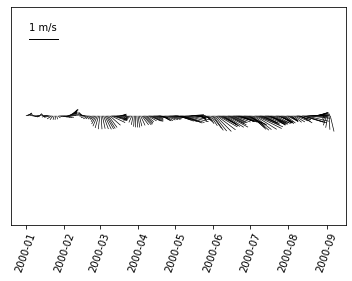

In [42]:
q = stick_plot(t, u, v)

ref = 1
qk = plt.quiverkey(q, 0.1, 0.85, ref,
                  "%s m/s " % ref,
                  labelpos='N', coordinates='axes')

_ = plt.xticks(rotation=70)

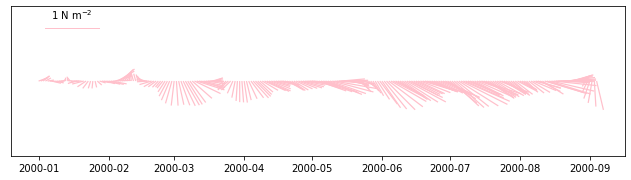

In [30]:

fig, ax = plt.subplots(figsize=(11, 2.75))

q = stick_plot(t, u, v, ax=ax, width=0.002, color='pink')

ref = 1
qk = ax.quiverkey(q, 0.1, 0.85, ref,
                  "m/s" % ref,
                  labelpos='N', coordinates='axes')

In [1]:
print('dara')

dara
